### Make plot with two x-axis scales
The original tutorial is located here:  
[Astropy Tutorial](http://www.astropy.org/astropy-tutorials/edshift_plot.html "Astropy Tutorials")

In [4]:
from astropy.cosmology import FlatLambdaCDM

# In this case we just need to define the matter density 
# and hubble parameter at z=0.

# Note the default units for the hubble parameter H0 are km/s/Mpc. 
# You can also pass an astropy `Quantity` with the units specified. 

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [5]:
import numpy as np
zvals = np.arange(0, 6, 0.1)
dist = cosmo.angular_diameter_distance(zvals)

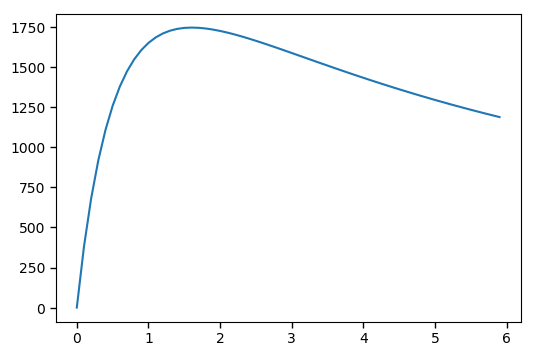

In [7]:
import matplotlib.pyplot as plt

# Set up matplotlib to use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
plt.rc('xtick.major', size=4)
plt.rc('ytick.major', size=4)
plt.rc('xtick.minor', size=2)
plt.rc('ytick.minor', size=2)
plt.rc('axes', grid=False)
plt.rc('xtick.major', width=1)
plt.rc('xtick.minor', width=1)
plt.rc('ytick.major', width=1)
plt.rc('ytick.minor', width=1)

%matplotlib inline

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist);

In [9]:
dist.unit

Unit("Mpc")

In [10]:
import astropy.units as u
ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1.5, 1.2, 1])*u.Gyr

In [11]:
from astropy.cosmology import z_at_value
ageticks = [z_at_value(cosmo.age, age) for age in ages]

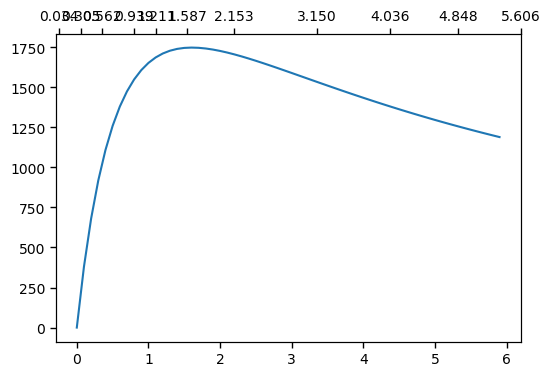

In [12]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks);

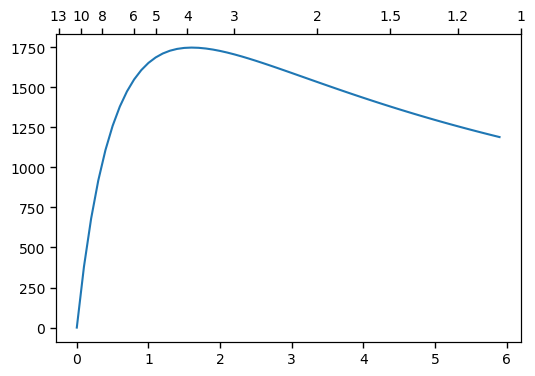

In [13]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value]);

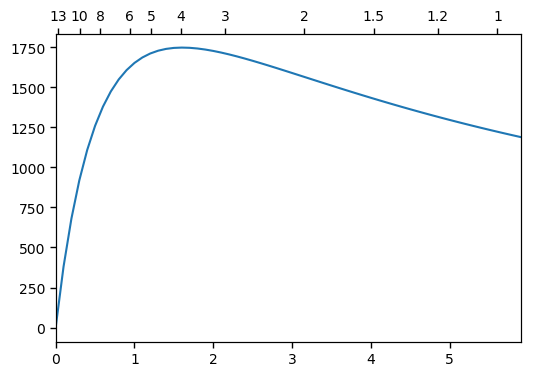

In [14]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0.0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax);

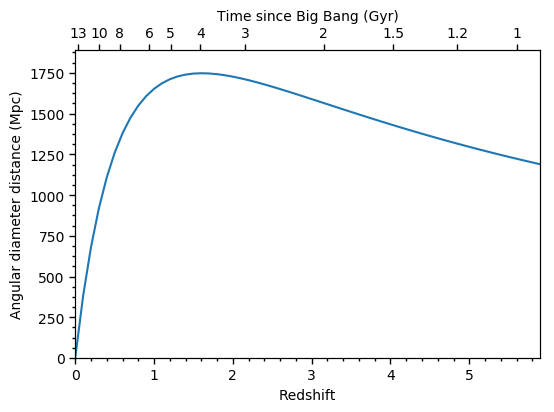

In [15]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)
ax2.set_xlabel('Time since Big Bang (Gyr)')
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular diameter distance (Mpc)')
ax.set_ylim(0, 1890)
ax.minorticks_on()